<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(3_6)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.6_n20.csv',
 'data_multi_delta_3.6_n30.csv',
 'data_multi_delta_3.6_n60.csv',
 'data_multi_delta_3.6_n120.csv',
 'data_multi_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,91.749686,22.530578,-57.390803,66.889462,-456.398726,523.288188
1,0.0,1.0,81.927655,90.868231,3952.820975,4135.616861,1029.361701,3106.255160
2,0.0,2.0,32.641176,83.287889,1290.537957,1416.467022,765.586450,650.880572
3,0.0,3.0,21.725233,76.302108,-1367.123335,-1259.095994,590.287620,-1849.383614
4,0.0,4.0,76.574784,95.824456,6410.208912,6592.608152,1128.000619,5464.607533
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,24.321734,86.350457,1542.030764,1662.702955,613.456497,1049.246457
59996,999.0,56.0,47.180985,50.913854,-681.425791,-573.330951,97.326085,-670.657037
59997,999.0,57.0,60.209910,38.656766,-178.094581,-69.227906,-66.481722,-2.746183
59998,999.0,58.0,39.539485,87.817531,2980.340473,3117.697489,681.261775,2436.435714


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,91.749686,22.530578,-57.390803,66.889462,-456.398726,523.288188
1,0.0,1.0,81.927655,90.868231,3952.820975,4135.616861,1029.361701,3106.255160
2,0.0,2.0,32.641176,83.287889,1290.537957,1416.467022,765.586450,650.880572
3,0.0,3.0,21.725233,76.302108,-1367.123335,-1259.095994,590.287620,-1849.383614
4,0.0,4.0,76.574784,95.824456,6410.208912,6592.608152,1128.000619,5464.607533
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,24.321734,86.350457,1542.030764,1662.702955,613.456497,1049.246457
59996,999.0,56.0,47.180985,50.913854,-681.425791,-573.330951,97.326085,-670.657037
59997,999.0,57.0,60.209910,38.656766,-178.094581,-69.227906,-66.481722,-2.746183
59998,999.0,58.0,39.539485,87.817531,2980.340473,3117.697489,681.261775,2436.435714


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    91.749686  22.530578   -57.390803    66.889462  -456.398726   
      1.0    81.927655  90.868231  3952.820975  4135.616861  1029.361701   
      2.0    32.641176  83.287889  1290.537957  1416.467022   765.586450   
      3.0    21.725233  76.302108 -1367.123335 -1259.095994   590.287620   
      4.0    76.574784  95.824456  6410.208912  6592.608152  1128.000619   
...                ...        ...          ...          ...          ...   
999.0 55.0   24.321734  86.350457  1542.030764  1662.702955   613.456497   
      56.0   47.180985  50.913854  -681.425791  -573.330951    97.326085   
      57.0   60.209910  38.656766  -178.094581   -69.227906   -66.481722   
      58.0   39.539485  87.817531  2980.340473  3117.697489   681.261775   
      59.0   69.258880  93.136536  3965.728264  4138.123680   853.969903   

                   e_hat  
rep   index               
0.0   0.0     523.288188  
      1.0    3106.255160  
      2.0     650.880572  
      3.0   -1849.383614  
      4.0    5464.607533  
...                  ...  
999.0 55.0   1049.246457  
      56.0   -670.657037  
      57.0     -2.746183  
      58.0   2436.435714  
      59.0   3284.153777  

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    91.749686  22.530578   -57.390803    66.889462  -456.398726   
      1.0    81.927655  90.868231  3952.820975  4135.616861  1029.361701   
      2.0    32.641176  83.287889  1290.537957  1416.467022   765.586450   
      3.0    21.725233  76.302108 -1367.123335 -1259.095994   590.287620   
      4.0    76.574784  95.824456  6410.208912  6592.608152  1128.000619   
...                ...        ...          ...          ...          ...   
999.0 55.0   24.321734  86.350457  1542.030764  1662.702955   613.456497   
      56.0   47.180985  50.913854  -681.425791  -573.330951    97.326085   
      57.0   60.209910  38.656766  -178.094581   -69.227906   -66.481722   
      58.0   39.539485  87.817531  2980.340473  3117.697489   681.261775   
      59.0   69.258880  93.136536  3965.728264  4138.123680   853.969903   

                   e_hat  
rep   index               
0.0   0.0     523.288188  
      1.0    3106.255160  
      2.0     650.880572  
      3.0   -1849.383614  
      4.0    5464.607533  
...                  ...  
999.0 55.0   1049.246457  
      56.0   -670.657037  
      57.0     -2.746183  
      58.0   2436.435714  
      59.0   3284.153777  

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,91.749686,22.530578,-57.390803,66.889462,-456.398726,523.288188
1,0.0,1.0,81.927655,90.868231,3952.820975,4135.616861,1029.361701,3106.255160
2,0.0,2.0,32.641176,83.287889,1290.537957,1416.467022,765.586450,650.880572
3,0.0,3.0,21.725233,76.302108,-1367.123335,-1259.095994,590.287620,-1849.383614
4,0.0,4.0,76.574784,95.824456,6410.208912,6592.608152,1128.000619,5464.607533
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,24.321734,86.350457,1542.030764,1662.702955,613.456497,1049.246457
59996,999.0,56.0,47.180985,50.913854,-681.425791,-573.330951,97.326085,-670.657037
59997,999.0,57.0,60.209910,38.656766,-178.094581,-69.227906,-66.481722,-2.746183
59998,999.0,58.0,39.539485,87.817531,2980.340473,3117.697489,681.261775,2436.435714


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    91.749686  22.530578   -57.390803    66.889462  -456.398726   
      1.0    81.927655  90.868231  3952.820975  4135.616861  1029.361701   
      2.0    32.641176  83.287889  1290.537957  1416.467022   765.586450   
      3.0    21.725233  76.302108 -1367.123335 -1259.095994   590.287620   
      4.0    76.574784  95.824456  6410.208912  6592.608152  1128.000619   
...                ...        ...          ...          ...          ...   
999.0 55.0   24.321734  86.350457  1542.030764  1662.702955   613.456497   
      56.0   47.180985  50.913854  -681.425791  -573.330951    97.326085   
      57.0   60.209910  38.656766  -178.094581   -69.227906   -66.481722   
      58.0   39.539485  87.817531  2980.340473  3117.697489   681.261775   
      59.0   69.258880  93.136536  3965.728264  4138.123680   853.969903   

                   e_hat  
rep   index               
0.0   0.0     523.288188  
      1.0    3106.255160  
      2.0     650.880572  
      3.0   -1849.383614  
      4.0    5464.607533  
...                  ...  
999.0 55.0   1049.246457  
      56.0   -670.657037  
      57.0     -2.746183  
      58.0   2436.435714  
      59.0   3284.153777  

[60000 rows x 6 columns]

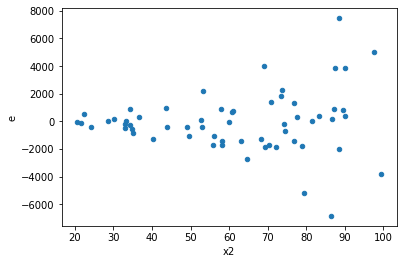

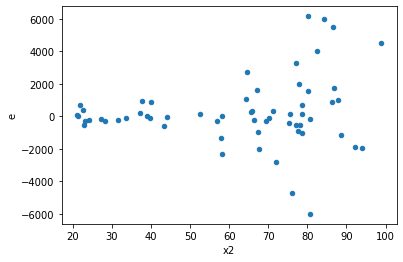

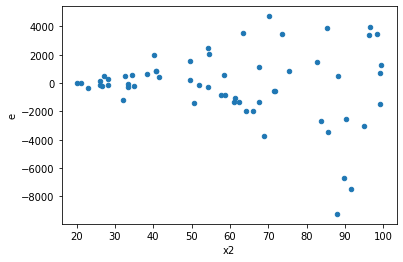

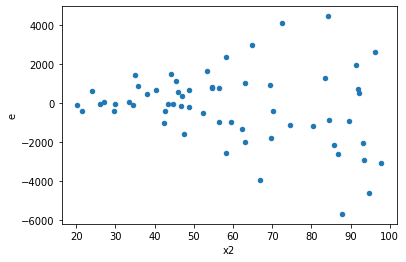

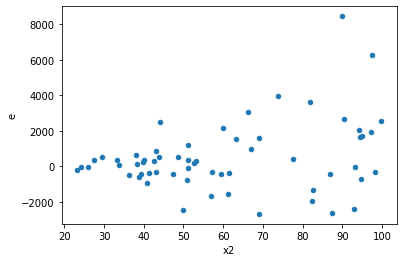

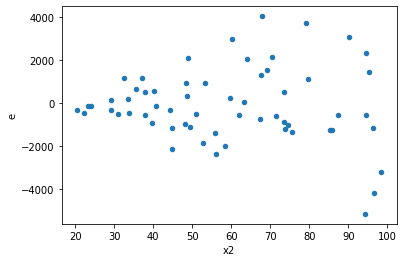

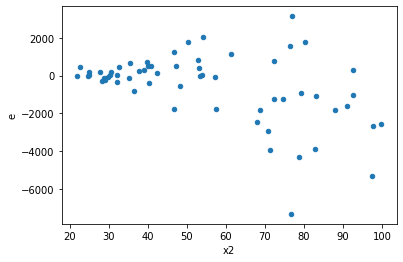

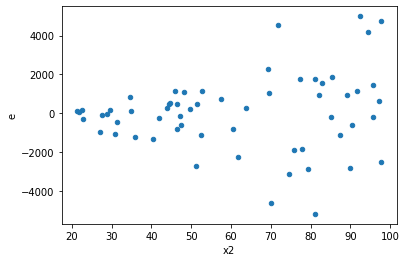

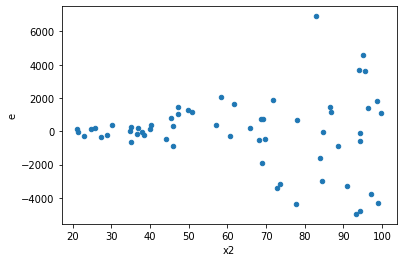

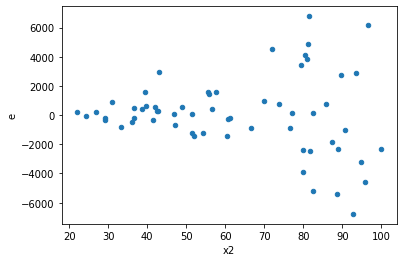

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,22.0,22.0,12853993.561761888,221671774.69259965,584272.4346255404,10075989.758754529,17.24536220027601,5.653287393769801e-09,0.9999999971733563,2.8266436968849007e-09,Reject005=0 : Heteroscedasticity
1.0,22.0,22.0,12164216.319217976,82956914.15230691,552918.9236008171,3770768.8251048597,6.819749992545358,3.0504095822614374e-05,0.9999847479520887,1.5252047911307187e-05,Reject005=0 : Heteroscedasticity
3.0,22.0,22.0,13729853.769800236,199595965.8854308,624084.2622636472,9072543.903883219,14.537370115656726,3.018276739652492e-08,0.9999999849086163,1.509138369826246e-08,Reject005=0 : Heteroscedasticity
4.0,22.0,22.0,15500206.399122441,242708825.54639423,704554.8363237473,11032219.343017919,15.658425397492476,1.4626741373646723e-08,0.9999999926866293,7.313370686823362e-09,Reject005=0 : Heteroscedasticity
5.0,22.0,22.0,99383421.10882029,103158152.24266882,4517428.232219104,4689006.92012131,1.037981497232978,0.9311209507760922,0.5344395246119539,0.4655604753880461,Reject005=1 : Homoscedasticity
7.0,22.0,22.0,11286240.229931653,71808159.51837745,513010.91954234784,3264007.2508353386,6.362451804626553,5.4531004222369006e-05,0.9999727344978888,2.7265502111184503e-05,Reject005=0 : Heteroscedasticity
8.0,22.0,22.0,21041090.728745036,52471685.44214278,956413.2149429562,2385076.61100649,2.4937721203995955,0.037158337925710105,0.981420831037145,0.018579168962855053,Reject005=0 : Heteroscedasticity
10.0,22.0,22.0,24362044.18753931,197864599.2631294,1107365.6448881505,8993845.421051336,8.121838945039476,6.751094921320089e-06,0.9999966244525393,3.3755474606600444e-06,Reject005=0 : Heteroscedasticity
11.0,22.0,22.0,16218870.466581007,144807614.8252011,737221.3848445913,6582164.310236413,8.928341534237989,2.9077951138045677e-06,0.9999985461024431,1.4538975569022838e-06,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,12853993.561761888,221671774.69259965,584272.4346255404,10075989.758754529,17.24536220027601,5.653287393769801e-09,Reject005=0 : Heteroscedasticity
1.0,22.0,22.0,12164216.319217976,82956914.15230691,552918.9236008171,3770768.8251048597,6.819749992545358,3.0504095822614374e-05,Reject005=0 : Heteroscedasticity
2.0,22.0,22.0,117451215.0872842,21148075.773524005,5338691.594876555,961276.1715238184,0.18005838217857306,0.00016463801759234259,Reject005=0 : Heteroscedasticity
3.0,22.0,22.0,13729853.769800236,199595965.8854308,624084.2622636472,9072543.903883219,14.537370115656726,3.018276739652492e-08,Reject005=0 : Heteroscedasticity
4.0,22.0,22.0,15500206.399122441,242708825.54639423,704554.8363237473,11032219.343017919,15.658425397492476,1.4626741373646723e-08,Reject005=0 : Heteroscedasticity
5.0,22.0,22.0,99383421.10882029,103158152.24266882,4517428.232219104,4689006.92012131,1.037981497232978,0.9311209507760922,Reject005=1 : Homoscedasticity
6.0,22.0,22.0,136301549.0945675,2436163.9452426294,6195524.958843977,110734.72478375588,0.017873340115543312,2.935283756241698e-14,Reject005=0 : Heteroscedasticity
7.0,22.0,22.0,11286240.229931653,71808159.51837745,513010.91954234784,3264007.2508353386,6.362451804626553,5.4531004222369006e-05,Reject005=0 : Heteroscedasticity
8.0,22.0,22.0,21041090.728745036,52471685.44214278,956413.2149429562,2385076.61100649,2.4937721203995955,0.037158337925710105,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    730
Reject005=1 : Homoscedasticity      270
Name: Result_test, dtype: int64